In [4]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [7]:
df = pd.read_csv("../data/owid-covid-data.csv")
df

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
134015      ZWE    Africa     Zimbabwe  2021-11-13     133393.0       64.0   
134016      ZWE    Africa     Zimbabwe  2021-11-14     133428.0       35.0   
134017      ZWE    Africa     Zimbabwe  2021-11-15     133438.0       10.0   
134018      ZWE    Africa     Zimbabwe  2021-11-16     133505.0       67.0   
134019      ZWE    Africa     Zimbabwe  2021-11-17     133557.0       52.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
134015              32.143        4696.0         2.0                1.571   
134016              34.429        4696.0         0.0                1.571   
134017              33.286        4697.0         1.0                1.000   
134018              37.571        4698.0         1.0                1.000   
134019              36.429        4699.0         1.0                0.714   

        ...  female_smokers  male_smokers  handwashing_facilities  \
0       ...             NaN           NaN                  37.746   
1       ...             NaN           NaN                  37.746   
2       ...             NaN           NaN                  37.746   
3       ...             NaN           NaN                  37.746   
4       ...             NaN           NaN                  37.746   
...     ...             ...           ...                     ...   
134015  ...             1.6          30.7                  36.791   
134016  ...             1.6          30.7                  36.791   
134017  ...             1.6          30.7                  36.791   
134018  ...             1.6          30.7                  36.791   
134019  ...             1.6          30.7                  36.791   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                              0.5            64.83                    0.511   
1                              0.5            64.83                    0.511   
2                              0.5            64.83                    0.511   
3                              0.5            64.83                    0.511   
4                              0.5            64.83                    0.511   
...                            ...              ...                      ...   
134015                         1.7            61.49                    0.571   
134016                         1.7            61.49                    0.571   
134017                         1.7            61.49                    0.571   
134018                         1.7            61.49                    0.571   
134019                         1.7            61.49                    0.571   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN   

In [6]:
df.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [3]:
end_date = df.date.iloc[-1]
df[df.date == end_date].sort_values(by="new_cases", ascending=False).dropna(subset=["continent"]).location.unique()

array(['United States', 'Germany', 'United Kingdom', 'Russia', 'Poland',
       'Turkey', 'Czechia', 'Netherlands', 'France', 'Ukraine', 'Belgium',
       'Austria', 'Brazil', 'India', 'Hungary', 'Italy', 'Vietnam',
       'Slovakia', 'Croatia', 'Spain', 'Greece', 'Thailand', 'Malaysia',
       'Iran', 'Switzerland', 'Georgia', 'Mexico', 'Slovenia', 'Denmark',
       'Ireland', 'Serbia', 'Romania', 'Singapore', 'South Korea',
       'Jordan', 'Bulgaria', 'Portugal', 'Canada', 'Norway', 'Colombia',
       'Lithuania', 'Chile', 'Azerbaijan', 'Belarus', 'Venezuela',
       'Argentina', 'Latvia', 'Peru', 'Sweden', 'Australia', 'Kazakhstan',
       'Philippines', 'Finland', 'Bolivia', 'Lebanon', 'Laos',
       'Bosnia and Herzegovina', 'Estonia', 'Armenia', 'Egypt', 'Moldova',
       'Dominican Republic', 'Myanmar', 'Iraq', 'Guatemala',
       'Trinidad and Tobago', 'Mongolia', 'Cyprus', 'Sri Lanka',
       'Albania', 'Israel', 'South Africa', 'Indonesia', 'Luxembourg',
       'North Macedo

In [4]:
print(df.dropna(subset=["continent"]).location.unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada

Text(0, 0.5, 'New Cases')

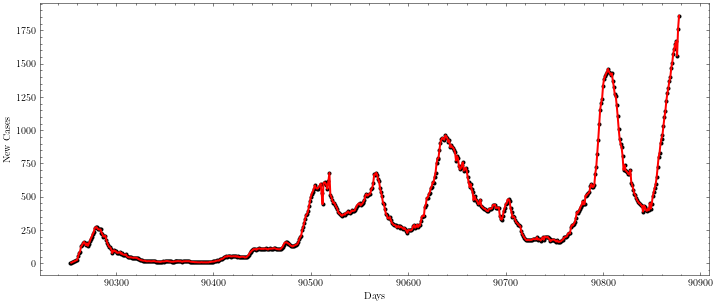

In [5]:
plt.figure(figsize=[12,5])
#plt.plot(range(len(df.loc[df['location'] == "Norway"]["new_cases"])), df.loc[df['location'] == "Norway"]["new_cases"], ".")
plt.plot(df.loc[df['location'] == "Norway"]["new_cases_smoothed"], ".", c="black") 
plt.plot(df.loc[df['location'] == "Norway"]["new_cases"].rolling(7).mean(), "-", lw=2, c="red") 
plt.xlabel("Days")
plt.ylabel("New Cases")

In [6]:
end_date = df.date.iloc[-1]
countries = df.loc[df.date == end_date].sort_values(by="new_cases", ascending=False).dropna(subset=["continent"]).head(6).location.to_numpy()
top_df = df.loc[df.location.isin(countries)]
#top_df

In [7]:
datetime.datetime.strptime(df.date.iloc[-100], r"%Y-%m-%d")
top_df[df.date.iloc[-3] >= top_df.date]
print()

In [8]:
alt.Chart(top_df).mark_circle(size=10).encode(
    x= 'date',
    y = 'new_cases'
).interactive()

alt.Chart(...)

In [10]:
import sys
sys.path.append("../")

from webvisualization_plots import *

In [ ]:
get_data_from_csv(columns=["new_cases", "continent", "location"], filename="../data/owid-covid-data.csv")

continent       location       date  new_cases  \
45195          Europe        Germany 2020-01-27        1.0   
45196          Europe        Germany 2020-01-28        3.0   
45197          Europe        Germany 2020-01-29        0.0   
45198          Europe        Germany 2020-01-30        0.0   
45199          Europe        Germany 2020-01-31        1.0   
...               ...            ...        ...        ...   
127138  North America  United States 2021-11-13    47499.0   
127139  North America  United States 2021-11-14    24810.0   
127140  North America  United States 2021-11-15   142099.0   
127141  North America  United States 2021-11-16    87481.0   
127142  North America  United States 2021-11-17   111106.0   

        new_cases_per_million  
45195                   0.012  
45196                   0.036  
45197                   0.000  
45198                   0.000  
45199                   0.012  
...                       ...  
127138                142.676  
127139                 74.524  
127140                426.833  
127141                262.773  
127142                333.737  

[3882 rows x 5 columns]

In [19]:
cases_df = get_data_from_csv(filename="../data/owid-covid-data.csv", countries=None, start=None, end=None)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.8/site-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/opt/homebrew/Caskroom/miniconda/base/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Index(['continent', 'location', 'date', 'new_cases', 'new_cases_per_million',
       'new_cases_per_million (rolling average)'],
      dtype='object')

In [38]:
cols = cases_df.columns#.to_numpy()
cols = cols[np.isin(cols, ["continent", "location", "date"], invert=True)]
",".join(cols)

'new_cases,new_cases_per_million,new_cases_per_million (rolling average)'